In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [92]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
df.duplicated().sum()

np.int64(723)

In [94]:
df.shape

(1025, 14)

In [95]:
df.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [96]:
df.sex.unique()

array([1, 0])

In [97]:
df["sex"].value_counts() 

sex
1    713
0    312
Name: count, dtype: int64

In [98]:
df["fbs"].value_counts()  

fbs
0    872
1    153
Name: count, dtype: int64

In [99]:
df["exang"].value_counts()

exang
0    680
1    345
Name: count, dtype: int64

In [100]:
df.cp.unique()

array([0, 1, 2, 3])

In [101]:
cols = ["trestbps", "chol", "thalach", "oldpeak"]
for col in cols:
    print(col)

trestbps
chol
thalach
oldpeak


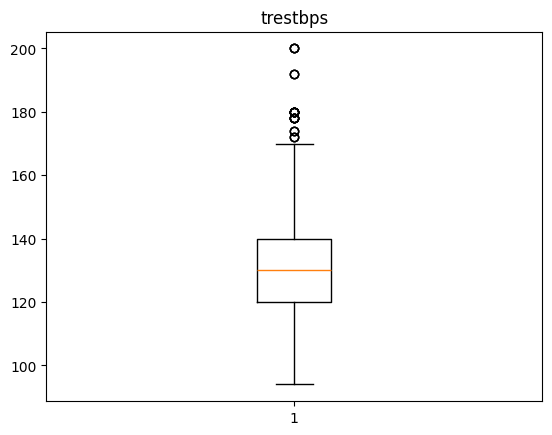

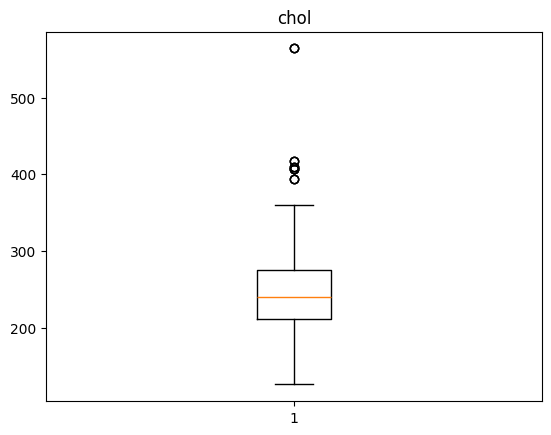

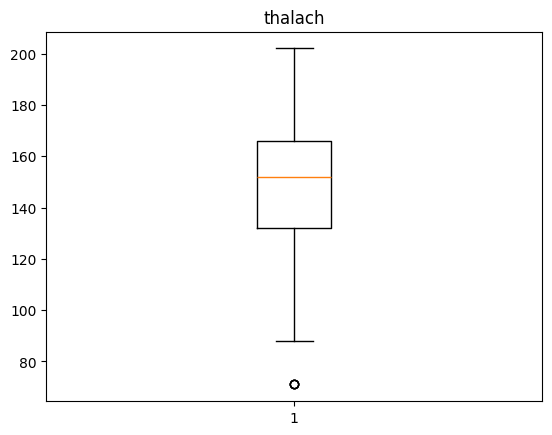

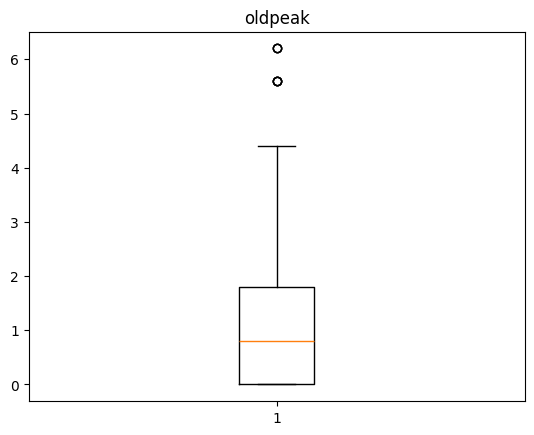

In [102]:
for col in cols:
    plt.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [103]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in cols:
    df = remove_outliers(df, col)


In [104]:
df.age.quantile(0.25)

np.float64(47.0)

In [105]:
df.age.quantile(0.75)

np.float64(61.0)

In [106]:
df.shape

(964, 14)

In [108]:
df.shape

(964, 14)

In [109]:
df["target"].value_counts()


target
1    508
0    456
Name: count, dtype: int64

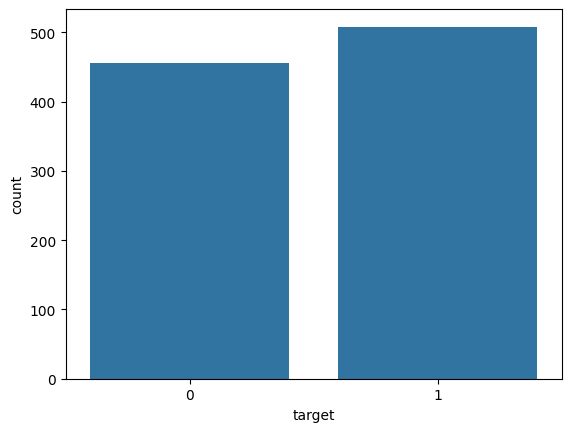

In [110]:
sns.countplot(x="target", data=df)
plt.show()


In [80]:
df.isnull().sum()
df.shape
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,54.057054,0.714730,0.964730,129.957469,242.134855,0.141079,0.524896,149.506224,0.328838,0.986203,1.415975,0.738589,2.310166,0.526971
std,9.142455,0.451777,1.029574,15.321181,45.094967,0.348284,0.513982,22.721506,0.470035,1.052420,0.599579,1.017053,0.618393,0.499531
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       964 non-null    int64  
 1   sex       964 non-null    int64  
 2   cp        964 non-null    int64  
 3   trestbps  964 non-null    int64  
 4   chol      964 non-null    int64  
 5   fbs       964 non-null    int64  
 6   restecg   964 non-null    int64  
 7   thalach   964 non-null    int64  
 8   exang     964 non-null    int64  
 9   oldpeak   964 non-null    float64
 10  slope     964 non-null    int64  
 11  ca        964 non-null    int64  
 12  thal      964 non-null    int64  
 13  target    964 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 113.0 KB


In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['age','trestbps','chol','thalach','oldpeak']
for col in cols:
    df[col] = scaler.fit_transform(df[[col]])

In [114]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.225117,1,0,-0.323738,-0.668600,0,1,0.814355,0,0.013116,2,2,3,0
1,-0.115680,1,0,0.655807,-0.868282,1,0,0.241913,1,2.009554,0,0,3,0
2,1.744742,1,0,0.982322,-1.511704,0,1,-1.079107,1,1.534211,0,0,3,0
3,0.759812,1,0,1.178231,-0.868282,0,1,0.506117,0,-0.937568,2,1,3,0
4,0.869249,0,0,0.525201,1.150729,1,1,-1.915754,0,0.868732,1,3,2,0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [117]:
X = df.drop('target',axis='columns')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.225117,1,0,-0.323738,-0.668600,0,1,0.814355,0,0.013116,2,2,3
1,-0.115680,1,0,0.655807,-0.868282,1,0,0.241913,1,2.009554,0,0,3
2,1.744742,1,0,0.982322,-1.511704,0,1,-1.079107,1,1.534211,0,0,3
3,0.759812,1,0,1.178231,-0.868282,0,1,0.506117,0,-0.937568,2,1,3
4,0.869249,0,0,0.525201,1.150729,1,1,-1.915754,0,0.868732,1,3,2


In [118]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,-1.428919,1,2,-1.172677,0.174503,0,1,1.298729,0,-0.937568,2,0,2
328,1.744742,1,0,0.002777,1.771963,0,0,-1.783652,0,1.344075,1,3,2
784,-0.006244,1,2,1.308837,-0.224861,0,0,0.682253,0,0.583527,2,0,3
756,1.088122,1,0,-0.650253,0.085756,0,0,-2.356094,1,1.153938,0,1,2
591,0.978685,0,0,-1.433889,0.596055,0,1,0.858389,1,0.773664,1,2,2


In [121]:
X_test.shape

(193, 13)

In [126]:
y_train.head()

207    1
328    0
784    1
756    0
591    0
Name: target, dtype: int64

In [127]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [129]:
model.score(X_test,y_test)

0.8601036269430051

In [131]:
model.predict(X_test.head())

array([0, 1, 0, 1, 0])

In [132]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.8573281452658884
Test Accuracy: 0.8601036269430051


In [133]:
y_pred = model.predict(X_test)


In [134]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 19]
 [ 8 85]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       100
           1       0.82      0.91      0.86        93

    accuracy                           0.86       193
   macro avg       0.86      0.86      0.86       193
weighted avg       0.87      0.86      0.86       193



In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN Test Accuracy:", knn.score(X_test, y_test))


KNN Test Accuracy: 0.8341968911917098


In [136]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)

print("Decision Tree Test Accuracy:", dt.score(X_test, y_test))


Decision Tree Test Accuracy: 0.9378238341968912


In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))


Random Forest Test Accuracy: 1.0


In [138]:
from sklearn.svm import SVC

svm = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)
print("SVM Test Accuracy:", svm.score(X_test, y_test))


SVM Test Accuracy: 0.9119170984455959


In [140]:
models = {
    "Logistic": model,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

for name, m in models.items():
    print(name, ":", m.score(X_test, y_test))



Logistic : 0.8601036269430051
KNN : 0.8341968911917098
Decision Tree : 0.9378238341968912
Random Forest : 1.0
SVM : 0.9119170984455959


In [141]:
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy :", rf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy : 1.0


In [142]:
rf_safe = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_safe.fit(X_train, y_train)
print("RF Safe Accuracy:", rf_safe.score(X_test, y_test))


RF Safe Accuracy: 0.917098445595855


In [ ]:
import joblib

joblib.dump(rf_safe, "heart_disease_model.pkl")
print("Saved: heart_disease_model.pkl")
